In [ ]:
# Сделаем необходимые импорты

import torch
import numpy as np
from torch import nn
import torchvision
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                              train=True,
                                              transform=transforms.ToTensor(),
                                              download=True)
image, label = train_dataset[0]
print(image.size())
print(label)


  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/
torch.Size([3, 32, 32])
19


In [ ]:
classes = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

cattle


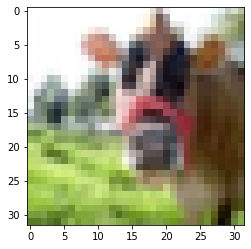

In [ ]:
plt.imshow(image.permute(1, 2, 0).numpy())
print(classes[label])

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [ ]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

Files already downloaded and verified


In [ ]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

class Net(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
    self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
    self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
    self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
    self.fc5 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    # print(f'x before leaky {x}')
    x = F.leaky_relu(x, 0.1)
    # print(f'x after leaky {x}')
    x = self.fc2(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc3(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc4(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc5(x)
    return x

  def predict(self, x):
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc2(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc3(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc4(x)
    x = F.leaky_relu(x, 0.1)
    x = self.fc5(x)
    x = F.softmax(x)

    return x

net = Net(3072, 100, 100)

In [ ]:
# Запустить обучение (по аналогии с тем, что делали на паре)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in tqdm(range(10)):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data[0], data[1]

    # обнуляем градиент
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # выводим статистику о процессе обучения
    running_loss += loss.item()
    if i % 300 == 0:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Training is finished!')
  

  0%|          | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.002
[1,   301] loss: 0.691
[1,   601] loss: 0.691


 10%|█         | 1/10 [00:27<04:08, 27.64s/it]

[2,     1] loss: 0.002
[2,   301] loss: 0.690
[2,   601] loss: 0.690


 20%|██        | 2/10 [00:54<03:39, 27.43s/it]

[3,     1] loss: 0.002
[3,   301] loss: 0.689
[3,   601] loss: 0.689


 30%|███       | 3/10 [01:22<03:12, 27.51s/it]

[4,     1] loss: 0.002
[4,   301] loss: 0.686
[4,   601] loss: 0.683


 40%|████      | 4/10 [01:50<02:46, 27.67s/it]

[5,     1] loss: 0.002
[5,   301] loss: 0.668
[5,   601] loss: 0.656


 50%|█████     | 5/10 [02:18<02:18, 27.64s/it]

[6,     1] loss: 0.002
[6,   301] loss: 0.643
[6,   601] loss: 0.638


 60%|██████    | 6/10 [02:45<01:50, 27.58s/it]

[7,     1] loss: 0.002
[7,   301] loss: 0.626
[7,   601] loss: 0.620


 70%|███████   | 7/10 [03:13<01:22, 27.63s/it]

[8,     1] loss: 0.002
[8,   301] loss: 0.611
[8,   601] loss: 0.610


 80%|████████  | 8/10 [03:41<00:55, 27.68s/it]

[9,     1] loss: 0.002
[9,   301] loss: 0.606
[9,   601] loss: 0.603


 90%|█████████ | 9/10 [04:09<00:27, 27.78s/it]

[10,     1] loss: 0.002
[10,   301] loss: 0.598
[10,   601] loss: 0.597


100%|██████████| 10/10 [04:36<00:00, 27.68s/it]

Training is finished!
